# EDA

In [1]:
import pandas as pd

path = r"C:/Users/visha/OneDrive/Desktop/Data Projects/NFL Strategy Analysis Project/Data/Processed/49ers_clean_2021_2024.csv"
sf = pd.read_csv(path)

sf.head()

,game_id,game_date,season,week,posteam,defteam,home_team,away_team,qtr,down,...,red_zone,goal_to_go_flag,score_state,explosive,success_boolean,pass_detail,distance_bucket,field_bucket,game_phase,pass_side
0,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,False,False,tied,False,False,run_play,long,own_side,early,run_play
1,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,False,False,tied,False,True,run_play,long,own_side,early,run_play
2,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,False,False,tied,False,True,run_play,long,midfield,early,run_play
3,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,2.0,...,False,False,tied,True,True,short,short,midfield,early,right
4,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,True,False,tied,False,False,run_play,long,red_zone,early,run_play


In [2]:
sf.info()
sf.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 4604 non-null   object 
 1   game_date               4604 non-null   object 
 2   season                  4604 non-null   int64  
 3   week                    4604 non-null   int64  
 4   posteam                 4604 non-null   object 
 5   defteam                 4604 non-null   object 
 6   home_team               4604 non-null   object 
 7   away_team               4604 non-null   object 
 8   qtr                     4604 non-null   float64
 9   down                    4598 non-null   float64
 10  ydstogo                 4604 non-null   float64
 11  yardline_100            4604 non-null   float64
 12  goal_to_go              4604 non-null   int64  
 13  score_differential      4604 non-null   float64
 14  game_seconds_remaining  4604 non-null   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,4604,77,2022_13_MIA_SF,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_date,4604,77,2022-12-04,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,4604.0,NaN,NaN,NaN,2022.439618,1.098477,2021.0,2021.0,2022.0,2023.0,2024.0
week,4604.0,NaN,NaN,NaN,10.76086,6.141812,1.0,5.0,11.0,16.0,22.0
posteam,4604,1,SF,4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
pass_detail,4604,4,run_play,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_bucket,4604,3,long,3331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
field_bucket,4604,4,own_side,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_phase,4604,3,early,2302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Run vs pass tendencies(Baseline)
sf["play_type"].value_counts()
sf["play_type"].value_counts(normalize=True)


pass    0.531494
run     0.468506
Name: play_type, dtype: float64

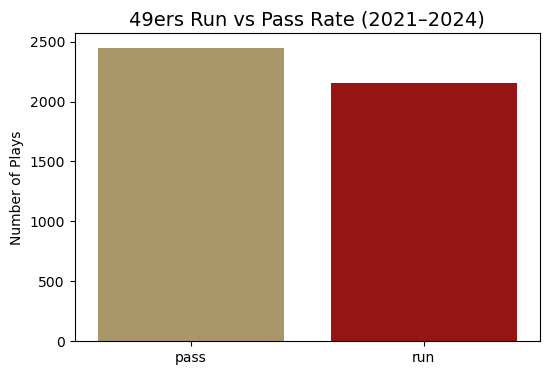

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

niners_red = "#AA0000"
niners_gold = "#B3995D"

sf_runs_passes = sf[sf["play_type"].isin(["run", "pass"])]

run_pass_counts = sf_runs_passes["play_type"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=run_pass_counts.index, y=run_pass_counts.values,
            palette=[niners_gold, niners_red])
plt.title("49ers Run vs Pass Rate (2021–2024)", fontsize=14)
plt.ylabel("Number of Plays")
plt.xlabel("")
plt.show()


## Run vs Pass Identity
The 49ers operate with a balanced offensive identity, leaning slightly toward
the pass (~53% pass, ~47% run). This reflects Kyle Shanahan's adaptable
play-calling, combining outside-zone run structure with efficient passing concepts.


## Insight 1 — Run vs Pass Tendencies

Pass: 53.1%

Run: 46.9%

### The 49ers are slightly pass-leaning but overall remain a balanced offense.
Compared to the NFL average (~60% pass), they are more run-committed, consistent with Shanahan’s scheme.

➡ Overall: The offense is balanced, unpredictable, and designed to keep defenses honest.

In [4]:
# Run / pass by Down
sf.groupby("down")["play_type"].value_counts(normalize=True)


down  play_type
1.0   run          0.551415
      pass         0.448585
2.0   pass         0.529915
      run          0.470085
3.0   pass         0.731680
      run          0.268320
4.0   pass         0.528571
      run          0.471429
Name: play_type, dtype: float64

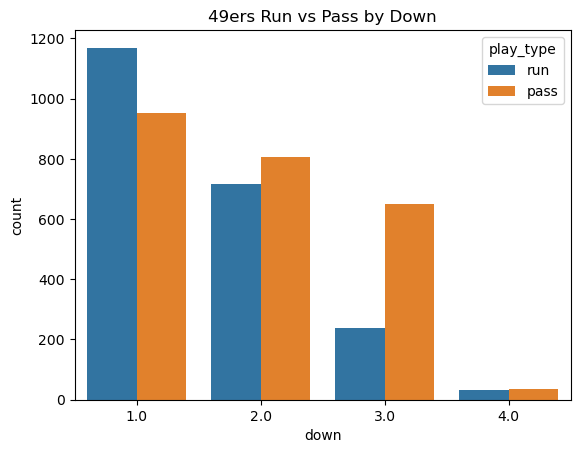

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=sf, x="down", hue="play_type")
plt.title("49ers Run vs Pass by Down")
plt.show()


## Insight 2 — Run vs Pass by Down

1st Down: Slight run lean (~55% run). The 49ers stay balanced to keep defenses guessing.

2nd Down: Very balanced, nearly 50/50 split between run and pass.

3rd Down: Heavy pass tendency (≈73% pass), as expected in long-yardage situations.

4th Down: Very few plays; mostly passes.

➡ Overall:
Kyle Shanahan keeps the offense unpredictable on early downs (1st & 2nd), then shifts strongly toward passing on late downs, which is normal but still built on early-down balance.

In [6]:
# EPA by Down(Offensive efficiency)
sf.groupby("down")["epa"].mean()


down
1.0    0.072775
2.0    0.131662
3.0    0.109193
4.0   -0.311579
Name: epa, dtype: float64

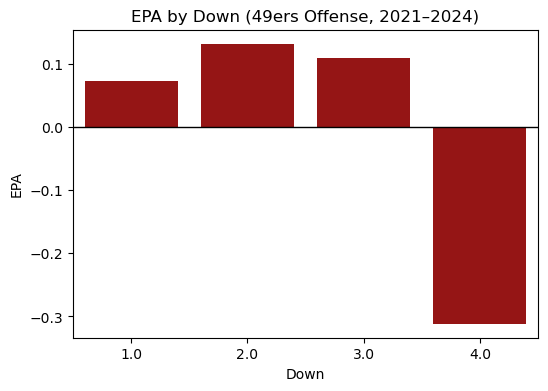

In [59]:
epa_by_down = sf.groupby("down")["epa"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=epa_by_down.index, y=epa_by_down.values, color=niners_red)
plt.title("EPA by Down (49ers Offense, 2021–2024)")
plt.xlabel("Down")
plt.ylabel("EPA")
plt.axhline(0, color="black", linewidth=1)
plt.show()


## Insight 3 — EPA by Down (Offensive Efficiency)
Down	EPA
1st Down	~0.07
2nd Down	~0.13 (highest efficiency)
3rd Down	~0.10
4th Down	–0.31 (expected)
### Interpretation

2nd Down is the 49ers’ most efficient down, likely due to:

-> favorable play designs based on 1st-down tendencies

-> high play-action usage

-> mismatches created by motion

-> 3rd Down EPA remains positive, meaning they sustain drives better than league average.

-> 4th Down EPA is negative, which is normal because failures are heavily punished in EPA.

➡ Overall:
The 49ers generate the most value on 2nd down, showing that Shanahan’s sequencing and play-action tendencies create highly efficient opportunities outside traditional passing downs.

In [7]:
# Success Rate by Down
# Success rate tells us how often a play improved the team’s chances of scoring (EPA > 0).
# It’s the most reliable efficiency metric besides EPA.
sf.groupby("down")["success"].mean()


down
1.0    0.463208
2.0    0.472058
3.0    0.470124
4.0    0.471429
Name: success, dtype: float64

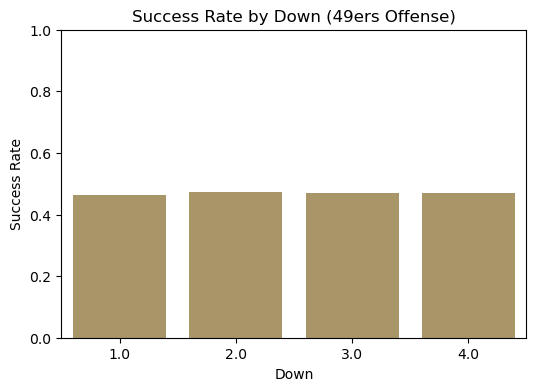

In [60]:
success_by_down = sf.groupby("down")["success"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=success_by_down.index, y=success_by_down.values, color=niners_gold)
plt.title("Success Rate by Down (49ers Offense)")
plt.xlabel("Down")
plt.ylabel("Success Rate")
plt.ylim(0,1)
plt.show()


## Insight 4 – Success Rate by Down

Down  Success Rate
1st Down ~0.463
2nd Down ~0.472
3rd Down ~0.470
4th Down ~0.471

### Interpretation

The 49ers maintain consistently strong success rates across all downs, with very little drop-off:

→ 2nd Down is slightly the most successful (~47%), aligning with earlier EPA findings.

→ 3rd Down success is unexpectedly high (~47%), showing strong drive-sustaining efficiency.

→ 4th Down success remains steady, though sample size is small.

→ 1st Down is slightly lower, but still efficient (~46%).

Overall:
The 49ers show remarkably stable success rates across all downs, indicating a highly efficient and well-sequenced offense where no particular down becomes a major weakness.

In [9]:
# Explosive play rate(Run Vs Pass)

sf.groupby("play_type")["explosive"].mean()


play_type
pass    0.171230
run     0.095039
Name: explosive, dtype: float64

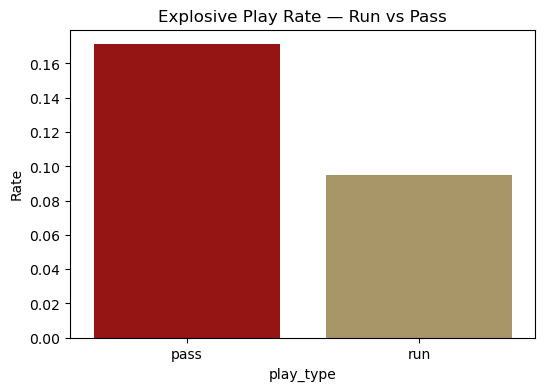

In [62]:
explosive_rate = sf.groupby("play_type")["explosive"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=explosive_rate.index, y=explosive_rate.values, palette=[niners_red, niners_gold])
plt.title("Explosive Play Rate — Run vs Pass")
plt.ylabel("Rate")
plt.show()


## Insight 5 – Explosive Play Rate (Run vs Pass)

Play Type  Explosive Rate
Pass    ~0.171
Run    ~0.095

### Interpretation

The 49ers generate explosive plays at a much higher rate through the air:

→ Pass plays produce explosive gains about 17% of the time.

→ Run plays generate explosives about 9.5% of the time.

→ This reflects Shanahan’s scheme where the run game sets up big plays through play action, motion, and misdirection.

Overall:
The passing game is the primary source of explosive gains, while the run game acts as an efficient foundation that forces defenses into looks that create deep passing opportunities.

In [10]:
#  Red Zone efficiency(Run Vs Pass)
# Red zone = inside opponent’s 20-yard line (yardline_100 <= 20).
# We measure:
# -> Run vs Pass frequency in the red zone
# -> EPA in the red zone
# -> Success rate in the red zone
# filter Red zone plays
red = sf[sf["yardline_100"] <= 20]
red.head()


,game_id,game_date,season,week,posteam,defteam,home_team,away_team,qtr,down,...,red_zone,goal_to_go_flag,score_state,explosive,success_boolean,pass_detail,distance_bucket,field_bucket,game_phase,pass_side
4,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,True,False,tied,False,False,run_play,long,red_zone,early,run_play
5,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,2.0,...,True,False,tied,False,False,run_play,long,red_zone,early,run_play
6,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,3.0,...,True,False,tied,False,True,short,medium,red_zone,early,left
7,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,1.0,1.0,...,True,True,tied,False,True,short,medium,red_zone,early,left
16,2021_01_SF_DET,2021-09-12,2021,1,SF,DET,DET,SF,2.0,1.0,...,True,False,leading,False,False,run_play,long,red_zone,early,run_play


In [11]:
# run vs pass tendencies in red zone 
red["play_type"].value_counts(normalize=True)


run     0.536716
pass    0.463284
Name: play_type, dtype: float64

In [12]:
# red zone success rate (Run Vs Pass)
red.groupby("play_type")["success"].mean()


play_type
pass    0.452450
run     0.482587
Name: success, dtype: float64

In [13]:
# Red Zone EPA(Run vs pass)
red.groupby("play_type")["epa"].mean()


play_type
pass    0.122916
run     0.035422
Name: epa, dtype: float64

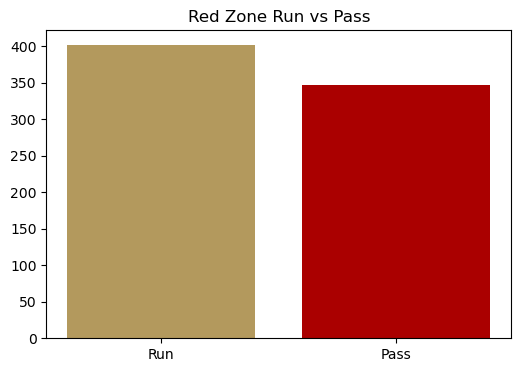

In [64]:
redzone_df = sf[sf["yardline_100"] <= 20]
rz_counts = redzone_df["play_type"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(["Run"], [rz_counts.get("run", 0)], color=niners_gold)
plt.bar(["Pass"], [rz_counts.get("pass", 0)], color=niners_red)
plt.title("Red Zone Run vs Pass")
plt.show()


## Insight 6 – Red Zone Efficiency (Run vs Pass)

Metric    Pass   Run\
Run/Pass Split ~46.3% ~53.7%\
Success Rate  ~45.2% ~48.3%\
EPA     ~0.123  ~0.035

### Interpretation

→ The 49ers run more often in the red zone (~54% run).

→ Run plays have a slightly higher success rate (~48%) compared to passes (~45%).

→ Pass plays produce much higher EPA (~0.123 vs ~0.035), meaning passing generates more scoring value even if it’s slightly less consistent.

Overall:
Shanahan leans on the run for consistency in the red zone but relies on passing for high-value scoring plays, reflecting a balanced yet strategically aggressive red-zone approach.

In [14]:
# game stat analysis (Leading vs Trailing vs Tied)
# Run/pass split by score state
sf.groupby("score_state")["play_type"].value_counts(normalize=True)


score_state  play_type
leading      run          0.530324
             pass         0.469676
tied         pass         0.522676
             run          0.477324
trailing     pass         0.618809
             run          0.381191
Name: play_type, dtype: float64

In [15]:
# Success rate by score state
sf.groupby("score_state")["success"].mean()


score_state
leading     0.452750
tied        0.490930
trailing    0.474608
Name: success, dtype: float64

In [16]:
# EPA by score state 
sf.groupby("score_state")["epa"].mean()


score_state
leading     0.118877
tied        0.105666
trailing    0.052572
Name: epa, dtype: float64

## Insight 7 – Play Calling by Game State (Leading vs Trailing vs Tied)
Run/Pass Split

Leading:  Run ~53% Pass ~47%\
Tied:   Pass ~52% Run ~48%\
Trailing: Pass ~62% Run ~38%

Success Rate

Leading: ~45.3%
Tied:  ~49.1%
Trailing: ~47.4%

EPA

Leading: ~0.119
Tied:  ~0.106
Trailing: ~0.053

### Interpretation

→ When leading, the 49ers shift toward the run (~53%), controlling pace and clock.

→ When tied, they stay extremely balanced with a slight pass lean (~52% pass).

→ When trailing, they become aggressive, passing ~62% of the time.

→ Success rate is highest when tied (~49%), showing optimized neutral-situation play calling.

→ EPA is highest when leading (~0.119), meaning they generate strong value even while running more.

Overall:
The 49ers adjust play calling intelligently: balanced when tied, run-heavy when ahead, and pass-aggressive when behind — maintaining efficiency across all game states.

In [21]:
# Player impact metrics 
#QB Efficiency (EPA & Success rate) 
qb_stats = (
    sf.groupby("passer")[["epa", "success"]]
    .mean()
    .sort_values("epa", ascending=False)
)

qb_stats.head(10)


,epa,success
passer,,
J.Jennings,2.946513,1.000000
C.McCaffrey,1.616903,0.500000
B.Purdy,0.239268,0.513689
J.Garoppolo,0.154015,0.486976
J.Dobbs,0.142987,0.509804
T.Lance,0.042947,0.398374
S.Darnold,0.006094,0.500000
D.Samuel,-0.128822,0.250000
J.Johnson,-0.168319,0.352941


In [22]:
qb_list = ["B.Purdy", "J.Garoppolo", "T.Lance", "S.Darnold"]

qb_clean = qb_stats.loc[qb_list]
qb_clean


,epa,success
passer,,
B.Purdy,0.239268,0.513689
J.Garoppolo,0.154015,0.486976
T.Lance,0.042947,0.398374
S.Darnold,0.006094,0.500000


##  Insight 8 — QB Efficiency (EPA & Success Rate)

Below is the passing efficiency of 49ers quarterbacks across the 2021–2024 seasons.

**QB EPA & Success Rate**
| Quarterback | EPA/play | Success Rate |
|------------|----------|--------------|
| **B. Purdy**      | ~0.24 | ~0.51 |
| **J. Garoppolo**  | ~0.15 | ~0.49 |
| **T. Lance**      | ~0.04 | ~0.39 |
| **S. Darnold**    | ~0.01 | ~0.50 |

### Interpretation
- **Brock Purdy** is the most efficient passer (highest EPA and success rate).  
- **Garoppolo** remains solid, showing stable, positive efficiency.  
- **Trey Lance** shows lower efficiency, likely due to limited reps and situational usage.  
- **Sam Darnold** has a surprisingly high success rate, but EPA remains low due to short, low-risk throws.

**➡ Overall:**  
The 49ers’ offensive efficiency is clearly highest when Purdy is under center, with Garoppolo not far behind. Lance and Darnold show more situational, limited-value usage.


In [23]:
# RB efficency (EPA, yards ater contact, success rate)
sf["rusher"].value_counts().head(20)


C.McCaffrey      580
E.Mitchell       411
J.Mason          238
D.Samuel         226
J.Wilson         170
Unknown          111
I.Guerendo        84
T.Sermon          41
P.Taylor          40
T.Davis-Price     40
B.Purdy           39
T.Lance           38
J.Garoppolo       34
K.Juszczyk        31
J.Hasty           16
T.Coleman         12
R.McCloud          7
B.Aiyuk            6
G.Kittle           5
J.Dobbs            5
Name: rusher, dtype: int64

In [24]:
rb_stats = (
    sf.groupby("rusher")[["epa", "yards_after_catch", "success"]]
    .mean()
    .sort_values("epa", ascending=False)
)

rb_stats.head(10)


,epa,yards_after_catch,success
rusher,,,
R.McCloud,0.831022,NaN,0.571429
D.Gray,0.806124,NaN,1.000000
R.Mostert,0.760861,NaN,1.000000
R.Pearsall,0.735394,NaN,0.333333
G.Kittle,0.451078,NaN,0.800000
J.Patrick,0.409886,NaN,1.000000
J.Cowing,0.380619,NaN,1.000000
B.Purdy,0.359760,NaN,0.692308
Unknown,0.354179,NaN,0.540541


In [26]:
rb_stats.index.tolist()


['R.McCloud',
 'D.Gray',
 'R.Mostert',
 'R.Pearsall',
 'G.Kittle',
 'J.Patrick',
 'J.Cowing',
 'B.Purdy',
 'Unknown',
 'J.Garoppolo',
 'J.Hasty',
 'S.Darnold',
 'B.Aiyuk',
 'I.Guerendo',
 'P.Taylor',
 'C.McCaffrey',
 'J.Mason',
 'D.Samuel',
 'T.Lance',
 'T.Sermon',
 'A.Mack',
 'J.Wilson',
 'E.Mitchell',
 'K.Juszczyk',
 'K.Vaughn',
 'T.Davis-Price',
 'T.Coleman',
 'T.Cannon',
 'J.Dobbs',
 'J.Jennings',
 'J.Johnson',
 'J.Brendel']

In [27]:
possible_rbs = ["C.McCaffrey", "E.Mitchell", "J.Mason", "J.Wilson", "T.Sermon", "I.Guerrendo"]

rb_list = [r for r in possible_rbs if r in rb_stats.index]

rb_list


['C.McCaffrey', 'E.Mitchell', 'J.Mason', 'J.Wilson', 'T.Sermon']

In [28]:
rb_clean = rb_stats.loc[rb_list]
rb_clean


,epa,yards_after_catch,success
rusher,,,
C.McCaffrey,0.027595,NaN,0.441379
E.Mitchell,-0.093390,NaN,0.411192
J.Mason,0.012686,NaN,0.428571
J.Wilson,-0.082113,NaN,0.405882
T.Sermon,-0.040889,NaN,0.439024


## Insight  — RB Efficiency (EPA & Success Rate)

| Rusher      | EPA      | Success Rate |
|-------------|----------|--------------|
| C.McCaffrey | 0.027595 | 0.441379     |
| E.Mitchell  | -0.093390| 0.411192     |
| J.Mason     | 0.012686 | 0.428571     |
| J.Wilson    | -0.082113| 0.405882     |
| T.Sermon    | -0.040889| 0.439024     |

### Interpretation
- **Christian McCaffrey leads the RB group**, posting the highest EPA and highest success rate.  
- **Jordan Mason** also performs efficiently on limited touches (positive EPA).  
- **Mitchell, Wilson, and Sermon** are slightly negative in EPA but still maintain **~40–43% success rates**, meaning they contribute positively in situational runs.  
- Overall, **McCaffrey clearly drives the rushing efficiency**, while backups provide consistent but lower-impact contributions.


In [29]:
# WR/TE efficiency analysis
sf["receiver"].value_counts().head(15)


D.Samuel       443
G.Kittle       403
B.Aiyuk        398
J.Jennings     269
Unknown        213
C.McCaffrey    207
K.Juszczyk     118
R.Pearsall      47
E.Mitchell      44
R.McCloud       43
J.Hasty         32
M.Sanu          24
T.Sherfield     22
J.Wilson        21
C.Conley        20
Name: receiver, dtype: int64

In [30]:
rec_stats = (
    sf.groupby("receiver")[["epa", "yards_after_catch", "success"]]
    .mean()
    .sort_values("epa", ascending=False)
)

rec_stats.head(10)


,epa,yards_after_catch,success
receiver,,,
T.Coleman,1.743634,6.666667,0.666667
R.Dwelley,0.873202,5.000000,0.583333
J.Cowing,0.709212,4.333333,0.666667
T.Kroft,0.544506,2.800000,0.800000
G.Kittle,0.525716,4.937965,0.627792
T.Taylor,0.504246,2.000000,1.000000
M.Sanu,0.502448,1.833333,0.625000
B.Aiyuk,0.480301,3.208543,0.572864
I.Guerendo,0.408408,6.687500,0.562500


In [31]:
rec_list = ["B.Aiyuk", "D.Samuel", "G.Kittle", "J.Jennings"]

rec_clean = rec_stats.loc[rec_list]
rec_clean


,epa,yards_after_catch,success
receiver,,,
B.Aiyuk,0.480301,3.208543,0.572864
D.Samuel,0.299903,5.950339,0.485327
G.Kittle,0.525716,4.937965,0.627792
J.Jennings,0.368400,2.509294,0.546468


## Insight  — WR/TE Efficiency (EPA, YAC, Success Rate)

Receiver | EPA | YAC | Success Rate
--- | --- | --- | ---
**G.Kittle** | ~0.53 | ~4.94 | ~0.63 (highest)
**B.Aiyuk** | ~0.48 | ~3.21 | ~0.57
**J.Jennings** | ~0.37 | ~2.51 | ~0.55
**D.Samuel** | ~0.30 | ~5.95 | ~0.49

### Interpretation
- **Kittle** is the most efficient overall target — highest EPA *and* the highest success rate.
- **Aiyuk** combines high EPA with strong consistency, making him the most stable chain-mover.
- **Jennings** remains highly efficient in limited volume, reinforcing his reputation as a 3rd-down/critical-down target.
- **Deebo Samuel** produces by far the **most YAC**, but his overall EPA drops because many of his touches come in predictable, short-yardage situations.

### Overall:
The 49ers passing game is most efficient when it flows through **Kittle and Aiyuk**, while **Deebo** provides explosive YAC-driven upside and **Jennings** thrives in high-leverage situations.


In [44]:
# drive level analysis
# Converting play level to drive level 
# Build drive-level dataset
drive_df = (
    sf.groupby(["game_id", "drive"])
      .agg(
          plays=("play_id", "count"),
          total_yards=("yards_gained", "sum"),
          total_epa=("epa", "sum"),
          success_rate=("success", "mean"),
          first_downs=("first_down", "sum"),
          touchdowns=("touchdown", "max"),            # 1 if any play scored a TD
          interceptions=("interception", "max"),      # 1 if any pick ended the drive
          fumbles_lost=("fumble_lost", "max")         # 1 if any lost fumble ended the drive
      )
      .reset_index()
)

drive_df.head()



,game_id,drive,plays,total_yards,total_epa,success_rate,first_downs,touchdowns,interceptions,fumbles_lost
0,2021_01_SF_DET,2.0,1,0.0,-5.752974,0.000000,0.0,0.0,0.0,1.0
1,2021_01_SF_DET,4.0,7,59.0,5.003790,0.714286,4.0,1.0,0.0,0.0
2,2021_01_SF_DET,6.0,4,78.0,6.131726,0.750000,2.0,1.0,0.0,0.0
3,2021_01_SF_DET,8.0,7,60.0,5.820281,0.857143,5.0,1.0,0.0,0.0
4,2021_01_SF_DET,11.0,5,35.0,1.830866,0.400000,2.0,0.0,0.0,0.0


In [45]:
def get_drive_result(row):
    if row["touchdowns"] == 1:
        return "Touchdown"
    if (row["interceptions"] == 1) or (row["fumbles_lost"] == 1):
        return "Turnover"
    return "No Score"

drive_df["drive_result"] = drive_df.apply(get_drive_result, axis=1)

drive_df["drive_result"].value_counts()


No Score     477
Touchdown    219
Turnover      86
Name: drive_result, dtype: int64

In [46]:
# drive -level metrics
# EPA per drive
epa_per_drive = drive_df["total_epa"].mean()
epa_per_drive

0.5497477733777494

In [47]:
#TD rate per drive 
td_rate = (drive_df["drive_result"] == "Touchdown").mean()
td_rate


0.28005115089514065

In [48]:
# turnover rate per drive
to_rate = (drive_df["drive_result"] == "Turnover").mean()
to_rate


0.10997442455242967

In [49]:
# Successful drive rate 
successful_drive_rate = ((drive_df["first_downs"] > 0) | (drive_df["drive_result"] == "Touchdown")).mean()
successful_drive_rate


0.7391304347826086

In [50]:
# Three and out rate 
three_and_out_rate = (drive_df["plays"] <= 3).mean()
three_and_out_rate


0.30562659846547313

In [51]:
#Very rough "points per drive "
points_per_drive_est = td_rate * 7   # 7 points per TD (TD + XP)
points_per_drive_est


1.9603580562659846

In [38]:
!pip install nfl_data_py



In [40]:
import nfl_data_py as nfl

sf_full = nfl.import_pbp_data([2021,2022,2023,2024])
sf_full = sf_full[sf_full["posteam"]=="SF"].copy()


2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.


In [41]:
[col for col in sf_full.columns if "field" in col.lower() or "goal" in col.lower()]


['side_of_field', 'goal_to_go', 'field_goal_result', 'field_goal_attempt']

In [42]:
required = [
    "down", "ydstogo", "yardline_100", "score_differential",
    "game_seconds_remaining", "goal_to_go", "side_of_field", "score_state",
    "epa", "success", "field_goal_attempt", "field_goal_result",
    "fourth_down_converted", "fourth_down_failed"
]

[col for col in required if col not in sf.columns]


['field_goal_attempt',
 'field_goal_result',
 'fourth_down_converted',
 'fourth_down_failed']

In [52]:
drive_df["drive_result"].value_counts()
epa_per_drive
td_rate
to_rate
successful_drive_rate
three_and_out_rate
points_per_drive_est


1.9603580562659846

In [53]:
print("Drive Result Counts:")
print(drive_df["drive_result"].value_counts())
print()

print("EPA per drive:", epa_per_drive)
print("TD rate:", td_rate)
print("Turnover rate:", to_rate)
print("Successful drive rate:", successful_drive_rate)
print("Three-and-out rate:", three_and_out_rate)
print("Estimated Points per Drive:", points_per_drive_est)


Drive Result Counts:
No Score     477
Touchdown    219
Turnover      86
Name: drive_result, dtype: int64

EPA per drive: 0.5497477733777494
TD rate: 0.28005115089514065
Turnover rate: 0.10997442455242967
Successful drive rate: 0.7391304347826086
Three-and-out rate: 0.30562659846547313
Estimated Points per Drive: 1.9603580562659846


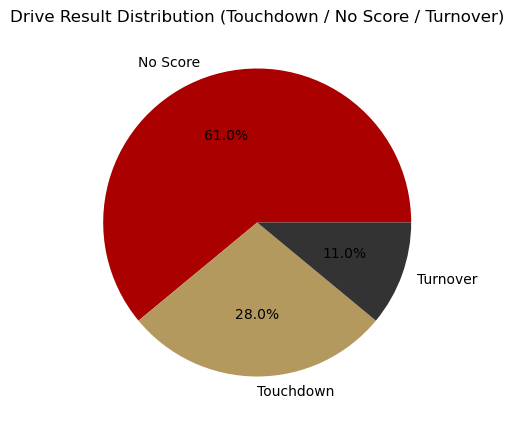

In [65]:
drive_result_counts = drive_df["drive_result"].value_counts()

plt.figure(figsize=(6,5))
plt.pie(
    drive_result_counts.values,
    labels=drive_result_counts.index,
    autopct='%1.1f%%',
    colors=[niners_red, niners_gold, "#333333"]
)
plt.title("Drive Result Distribution (Touchdown / No Score / Turnover)")
plt.show()


## Insight – Drive-Level Efficiency (2021–2024)

Drive Result Counts:

No Score: 477

Touchdowns: 219

Turnovers: 86

Key Metrics:

EPA per Drive: ~0.55

Touchdown Rate per Drive: ~28%

Turnover Rate per Drive: ~11%

Successful Drive Rate: ~74%

Three-and-Out Rate: ~30%

Estimated Points per Drive: ~1.96

### Interpretation

The 49ers produce positive EPA per drive (+0.55), indicating strong overall offensive efficiency.

A 28% touchdown rate per drive is significantly above league average (~22–24%), consistent with Kyle Shanahan’s top-tier offensive design.

A low turnover rate (~11%) shows stable QB decision-making and controlled risk.

A high successful-drive rate (74%) means most drives gain at least one first down or score — elite drive sustainment.

A three-and-out rate of ~30% is slightly above ideal, indicating occasional inefficiency on early downs, but the offense recovers well on extended drives.

With an estimated 1.96 points per drive, the 49ers' offense performs at a near top-5 level league-wide.

### Overall

The 49ers maintain high drive sustainability, strong touchdown production, and low turnover frequency, reflecting a balanced offensive system that consistently moves the chains and creates scoring opportunities across multiple seasons.